### Import Libs

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import random

### Create Individual

In [91]:
def create_individual():
    # TODO: create a random chromosome
    arr = np.array(range(1,9,1))
    np.random.shuffle(arr)
    
    return arr.tolist()

### Generate Population

In [92]:
def generate_population(population_size:int = 20):
    population = []

    for _ in range(population_size):
        new_individual = create_individual()
        population.append(new_individual)
    
    return population

### Parent Selection

In [93]:
def SUS(population: dict, population_size:int = 20):
    probability_ruler = []
    population_keys = list(population.keys())
    
    selected_list = []
    
    for i in range(len(population)):
        if i == 0:
            probability_ruler.append(population[population_keys[i]])
            continue
        probability_ruler.append(population[population_keys[i]] + probability_ruler[i - 1])
    
    rand_prob = random.random() / population_size
    
    index = 0
    for i in range(population_size):
        current_prob = rand_prob + i / population_size
        if current_prob < probability_ruler[index]:
            selected_list.append(population_keys[index])
        else:
            index += 1
            for j in range(index, len(population_keys)):
                if current_prob < probability_ruler[j]:
                    index = j
                    selected_list.append(population_keys[index])
                    break
            
    return selected_list

In [94]:
def parent_selection(population: dict ,population_size:int = 20):
    #TODO: choose the pairs of parents
    sum_population = sum(population.values())
    prob_population = {}
    for p in population.keys():
        prob_population[p] = population[p] / sum_population
    
    parents = SUS(prob_population,population_size)
            
    return parents

### Next Generation Selection

In [95]:
def next_generation_selection(children_population):
    next_generation = []
    #TODO: choose the next_generation    
    return children_population

### Crossover

In [96]:
def crossover(parents):
    offsprings = []
    # TODO: implement you crossover algorithm
    parents = np.array(parents)
    np.random.shuffle(parents)
    queen_number = len(parents[0].split(" "))

    for i in range(int(len(parents) / 2)):
        if random.random() > 0.8:
            continue

        crossover_point = random.randint(0, queen_number - 1)

        parent_1 = [int(p) for p in parents[2 * i].split(" ")]
        parent_2 = [int(p) for p in parents[2 * i + 1].split(" ")]

        offspring_1 = parent_1[:crossover_point]
        offspring_2 = parent_2[:crossover_point]

        index = crossover_point
        for j in range(queen_number - crossover_point):
            if parent_2[index] not in offspring_1:
                offspring_1.append(parent_2[index])
                index = (index + 1) % queen_number
                continue

            while parent_2[index] in offspring_1:
                index = (index + 1) % queen_number

            offspring_1.append(parent_2[index])

        index = crossover_point
        for j in range(queen_number - crossover_point):
            if parent_1[index] not in offspring_2:
                offspring_2.append(parent_1[index])
                index = (index + 1) % queen_number
                continue

            while parent_1[index] in offspring_2:
                index = (index + 1) % queen_number

            offspring_2.append(parent_1[index])

        offsprings.append(offspring_1)
        offsprings.append(offspring_2)

    return offsprings

### Mutation

In [97]:
def mutate(population):
    # TODO: implement mutate
    mutated_population = []
    queen_number = len(population[0])
    for p in population:
        if random.random() < 0.05:
            index1 = random.randint(0, queen_number - 1)
            index2 = random.randint(0, queen_number - 1)
            while index1 == index2:
                index2 = random.randint(0, queen_number - 1)

            m = p
            m[index1], m[index2] = m[index2], m[index1]
            mutated_population.append(m)
            continue
        mutated_population.append(p)

    return mutated_population

### Score Function

In [98]:
def fitness_score(seq):
    fit_score = 0
    #TODO: calculate fitness score
    status_queen = np.ones(len(seq))
    for current_row in range(len(seq)):
        flag = 1
        for other_row in range(current_row+1,len(seq)):
            if seq[current_row] == seq[other_row]:
                # print(current_row, other_row)
                status_queen[current_row] = 0
                status_queen[other_row] = 0
                flag = 0
                continue
            if abs(seq[current_row] - seq[other_row]) == abs(current_row - other_row):
                # print(current_row, other_row)
                status_queen[current_row] = 0
                status_queen[other_row] = 0
                flag = 0
                continue
        
        if flag==1 and status_queen[current_row] == 1: 
            # print(flag , current_row)
            fit_score += 1
    return fit_score

In [99]:
fitness_score([5, 4, 7, 6, 2, 3, 1, 8])

2

## Calculate Population Fitness

In [100]:
def population_fitness(population):
    population_fitness = 0
    individuals_fitnesses:dict = {}
    for chromosome in population:
        fitness_sc = fitness_score(chromosome)
        population_fitness += fitness_sc
        ch= ' '.join(str(x) for x in chromosome)
        # print(ch)
        individuals_fitnesses[ch] = fitness_sc
    return individuals_fitnesses ,population_fitness

### Termination Condition

In [101]:
def check_end(population) -> bool:
    #TODO: check end of algorithm
    queen_number = len(list(population.keys())[0].split(" "))
    for p in population.keys():
        if population[p] == queen_number:
            return True
    return False

In [102]:
def get_solution(population):
    queen_number = len(list(population.keys())[0].split(" "))
    for p in population.keys():
        if population[p] == queen_number:
            return p

### Run Your Algorithms

In [103]:
# The genetic algorithm
generation = 0
solution_is_found = False
fitness = []

population = generate_population()
population , population_fit = population_fitness(population)

while not check_end(population):
    # TODO: this is a default setup which you maybe need to change.
    population = parent_selection(population)
    population = crossover(population)
    population = mutate(population)
    population = next_generation_selection(population)
    population , population_fit = population_fitness(population)
    
    generation += 1
    avg_fit = population_fit / population.__len__()
    fitness.append(avg_fit)


### See Your Progress Over Generations

In [104]:
solution= get_solution(population)
print(f"solution found: {solution}")

solution found: 6 3 7 2 8 5 1 4


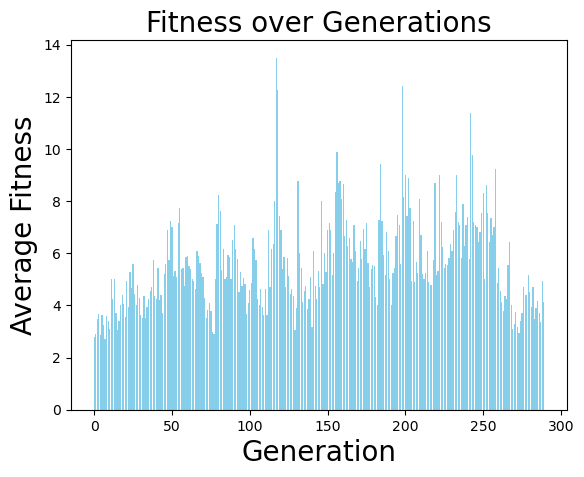

In [105]:
plt.bar(range(generation), fitness, color='skyblue')
plt.xlabel('Generation', fontsize=20)
plt.ylabel('Average Fitness', fontsize=20)
plt.title('Fitness over Generations', fontsize=20)
plt.show()